In [12]:
import time
import numpy as np
import matplotlib.pyplot as plt

from src.algorithms import algorithms, search_algorithm
from src.sokoban import SokobanBoard, SokobanAction

## Functions

In [26]:
def open_board(board_path):
    with open(board_path, "r") as f:
        board = SokobanBoard.board_builder(f.read())
    return board

In [35]:
def exec_times(algorithm, board, iters = 20):
    iters = 20
    execution_times = np.empty(iters)
    
    for i in range(0,iters):
        start_time = time.time()
        start_time = time.time()
        
        result = search_algorithm(
            board,
            [SokobanAction.UP, SokobanAction.DOWN, SokobanAction.LEFT, SokobanAction.RIGHT],
            algorithms[algorithm]
        )
        execution_times[i] = time.time() - start_time
    return execution_times

In [46]:
def plot_exec_times(algorithm, execution_times):
    execution_times_ms = execution_times * 1000  
    
    # Compute statistics
    average_ms = np.mean(execution_times_ms)
    variance_ms = np.var(execution_times_ms)
    
    # Create execution index (0, 1, 2, ..., N)
    execution_index = np.arange(len(execution_times))
    
    # Plot execution times
    plt.figure(figsize=(8, 5))
    plt.plot(execution_index, execution_times_ms, marker="o", linestyle="-", label="Execution Time (ms)")
    
    # Plot average as a horizontal line
    plt.axhline(average_ms, color="red", linestyle="--", label=f"Avg: {average_ms:.2f} ms")
    
    # Plot variance as a shaded region
    plt.fill_between(execution_index, 
                     average_ms - variance_ms, average_ms + variance_ms, 
                     color='blue', alpha=0.2, label=f"Variance: {variance_ms:.2f} ms²")
    
    # Formatting
    plt.xlabel("Execution Index (Iteration)")
    plt.ylabel("Time (ms)")
    plt.title(f"Execution Time Analysis for {algorithm}")
    plt.xticks(execution_index)  # Ensure x-axis has integer values
    plt.ylim(0, 3.5)  # Adjust y-axis to be within range
    plt.legend()
    plt.grid(True)
    
    # Show plot
    plt.show()

## Results

In [42]:
board = open_board('boards/board1.txt')

In [43]:
algorithm = 'a*_man'
execution_times = exec_times(algorithm, board)

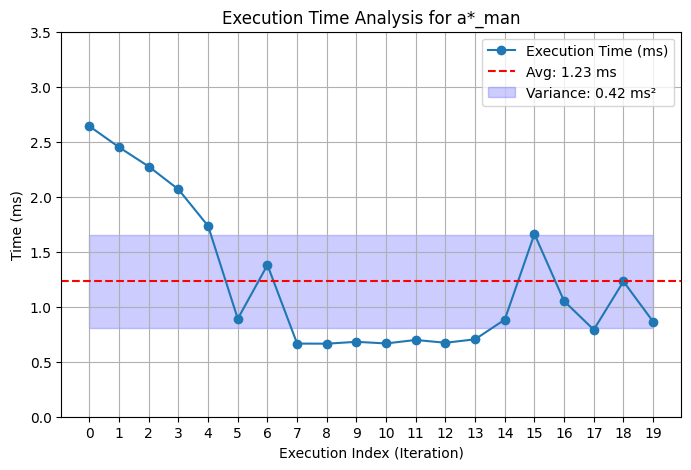

In [47]:
plot_exec_times(algorithm, execution_times)